# MNIST Project 

## Data importing and image loading

In [87]:
import pandas as pd
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [88]:
data = pd.read_csv("english.csv")
data

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


In [89]:
key_dict = {
    0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,
    10:"a",11:"b",12:"c",13:"d",14:"e",15:"f",16:"g",17:"h",18:"i",19:"j",
    20:"k",21:"l",22:"m",23:"n",24:"o",25:"p",26:"q",27:"r",28:"s",29:"t",
    30:"u",31:"v",32:"w",33:"x",34:"y",35:"z"
}

In [90]:
df = data
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


In [122]:
IMG_WIDTH=32
IMG_HEIGHT=32
images = []

for path in df["image"]:
    image = cv2.imread(path, 0) 
    
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    image = np.array(image)
    image = image.astype('float32')
    image /= 255 
    images.append(image)


In [123]:
images[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

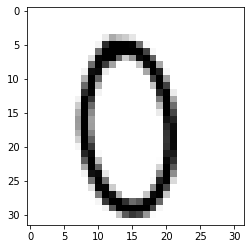

In [124]:
import matplotlib.pyplot as plt

plt.imshow(images[2], cmap="gray")
plt.show()

## First Tryout

In [125]:
num_classes = 36
input_shape = (32, 32, 1)
batch_size = 32
epochs = 32


In [129]:
from sklearn.preprocessing import LabelEncoder

images_first = images[:]

images_first = np.expand_dims(images_first, -1)
x_train, x_test, y_train, y_test = train_test_split(images_first, [i.upper() for i in df['label']])
print("x_train shape:", x_train.shape)
print(len(x_train), "train samples")
print(len(x_test), "test samples")

train_trans = LabelEncoder().fit_transform(y_train)
test_trans = LabelEncoder().fit_transform(y_test)

y_train = keras.utils.to_categorical(train_trans, num_classes)
y_test = keras.utils.to_categorical(test_trans, num_classes)

x_train shape: (2557, 32, 32, 1)
2557 train samples
853 test samples


In [130]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 2304)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 36)               

In [131]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/32
72/72 [==============================] - 3s 35ms/step - loss: 3.5458 - accuracy: 0.0430 - val_loss: 3.4533 - val_accuracy: 0.0508
Epoch 2/32
72/72 [==============================] - 2s 28ms/step - loss: 3.2189 - accuracy: 0.1473 - val_loss: 2.9685 - val_accuracy: 0.2109
Epoch 3/32
72/72 [==============================] - 2s 29ms/step - loss: 2.5794 - accuracy: 0.3047 - val_loss: 2.4572 - val_accuracy: 0.3477
Epoch 4/32
72/72 [==============================] - 3s 36ms/step - loss: 2.0898 - accuracy: 0.4124 - val_loss: 2.0468 - val_accuracy: 0.4609
Epoch 5/32
72/72 [==============================] - 2s 30ms/step - loss: 1.7617 - accuracy: 0.4841 - val_loss: 1.8604 - val_accuracy: 0.5156
Epoch 6/32
72/72 [==============================] - 3s 37ms/step - loss: 1.5612 - accuracy: 0.5419 - val_loss: 1.7093 - val_accuracy: 0.5312
Epoch 7/32
72/72 [==============================] - 2s 32ms/step - loss: 1.3928 - accuracy: 0.5976 - val_loss: 1.6824 - val_accuracy: 0.5234
Epoch 8/32
72

In [132]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.210801362991333
Test accuracy: 0.7198124527931213


###### It is clear that since the lose is going down but val_lose it stay the same, also the val_acc is not increasing. So it is a clear sign of this is not a good model and we may fill in some overfitting situation. The reason of this overfitting is because the dataset is too small, like fir each character there are only near 100 images and we need to split some for testing. There are not enough images for training the model. So I decide to expand the dataset using image augmentation.

## Image augmentation and union

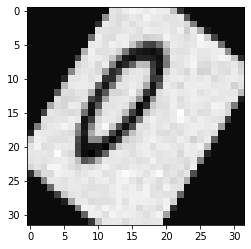

In [133]:
import imgaug.augmenters as iaa

augmentated_images = []
for i in images:
    gaussian_noise=iaa.AdditiveGaussianNoise(0.01,0.05)
    noise_image=gaussian_noise.augment_image(i)
    shear = iaa.Affine(shear=(0,40))
    shear_image=shear.augment_image(noise_image)
    augmentated_images.append(shear_image)
    
    
plt.imshow(augmentated_images[0], cmap="gray") 
plt.show()

In [134]:

images = images + augmentated_images
labels = [i.upper() for i in df['label']] + [i.upper() for i in df['label']]

## Second Tryout

In [135]:
from sklearn.preprocessing import LabelEncoder



images = np.expand_dims(images, -1)
x_train, x_test, y_train, y_test = train_test_split(images, labels)
print("x_train shape:", x_train.shape)
print(len(x_train), "train samples")
print(len(x_test), "test samples")

train_trans = LabelEncoder().fit_transform(y_train)
test_trans = LabelEncoder().fit_transform(y_test)

y_train = keras.utils.to_categorical(train_trans, num_classes)
y_test = keras.utils.to_categorical(test_trans, num_classes)

x_train shape: (5115, 32, 32, 1)
5115 train samples
1705 test samples


In [136]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 2304)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 36)              

In [99]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/32
144/144 [==============================] - 5s 28ms/step - loss: 3.4642 - accuracy: 0.0693 - val_loss: 3.1446 - val_accuracy: 0.2480
Epoch 2/32
144/144 [==============================] - 4s 28ms/step - loss: 2.6392 - accuracy: 0.2881 - val_loss: 2.0783 - val_accuracy: 0.4277
Epoch 3/32
144/144 [==============================] - 4s 29ms/step - loss: 1.9667 - accuracy: 0.4473 - val_loss: 1.7216 - val_accuracy: 0.5566
Epoch 4/32
144/144 [==============================] - 4s 29ms/step - loss: 1.6589 - accuracy: 0.5257 - val_loss: 1.5181 - val_accuracy: 0.5801
Epoch 5/32
144/144 [==============================] - 4s 29ms/step - loss: 1.4859 - accuracy: 0.5718 - val_loss: 1.3454 - val_accuracy: 0.6309
Epoch 6/32
144/144 [==============================] - 4s 29ms/step - loss: 1.3442 - accuracy: 0.6029 - val_loss: 1.2475 - val_accuracy: 0.6641
Epoch 7/32
144/144 [==============================] - 4s 29ms/step - loss: 1.2213 - accuracy: 0.6400 - val_loss: 1.1741 - val_accuracy: 0.6875

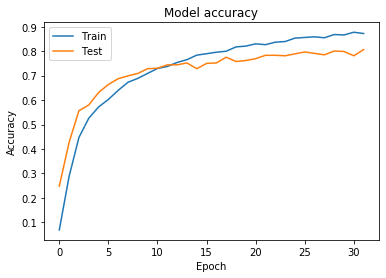

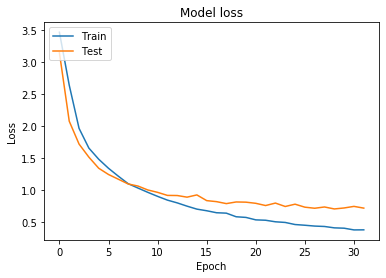

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [101]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8730539083480835
Test accuracy: 0.7806451320648193


In [111]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_split=0.2)

Epoch 1/32
32/32 [==============================] - 5s 122ms/step - loss: 3.5558 - accuracy: 0.0354 - val_loss: 3.5247 - val_accuracy: 0.0626
Epoch 2/32
32/32 [==============================] - 4s 114ms/step - loss: 3.4544 - accuracy: 0.0848 - val_loss: 3.3383 - val_accuracy: 0.1417
Epoch 3/32
32/32 [==============================] - 3s 107ms/step - loss: 3.1298 - accuracy: 0.1782 - val_loss: 2.8534 - val_accuracy: 0.2776
Epoch 4/32
32/32 [==============================] - 3s 104ms/step - loss: 2.6998 - accuracy: 0.2730 - val_loss: 2.4609 - val_accuracy: 0.3617
Epoch 5/32
32/32 [==============================] - 4s 125ms/step - loss: 2.3299 - accuracy: 0.3639 - val_loss: 2.1161 - val_accuracy: 0.4262
Epoch 6/32
32/32 [==============================] - 3s 104ms/step - loss: 2.0537 - accuracy: 0.4286 - val_loss: 1.9075 - val_accuracy: 0.4946
Epoch 7/32
32/32 [==============================] - 3s 103ms/step - loss: 1.8315 - accuracy: 0.4924 - val_loss: 1.7397 - val_accuracy: 0.5396
Epoch 

In [112]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0485948324203491
Test accuracy: 0.7102639079093933


In [138]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=16, epochs=epochs, validation_split=0.1)

Epoch 1/32
288/288 [==============================] - 6s 20ms/step - loss: 3.4505 - accuracy: 0.0821 - val_loss: 3.0480 - val_accuracy: 0.1738
Epoch 2/32
288/288 [==============================] - 5s 17ms/step - loss: 2.4136 - accuracy: 0.3296 - val_loss: 2.1009 - val_accuracy: 0.4336
Epoch 3/32
288/288 [==============================] - 5s 17ms/step - loss: 1.8813 - accuracy: 0.4645 - val_loss: 1.8127 - val_accuracy: 0.4922
Epoch 4/32
288/288 [==============================] - 6s 19ms/step - loss: 1.6769 - accuracy: 0.5127 - val_loss: 1.6187 - val_accuracy: 0.5332
Epoch 5/32
288/288 [==============================] - 4s 15ms/step - loss: 1.5099 - accuracy: 0.5631 - val_loss: 1.5158 - val_accuracy: 0.5605
Epoch 6/32
288/288 [==============================] - 5s 17ms/step - loss: 1.3671 - accuracy: 0.5955 - val_loss: 1.5167 - val_accuracy: 0.5840
Epoch 7/32
288/288 [==============================] - 6s 20ms/step - loss: 1.2778 - accuracy: 0.6235 - val_loss: 1.3460 - val_accuracy: 0.6250

In [139]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8946492671966553
Test accuracy: 0.7565982341766357


###### We did some experiments on batchsize (16, 32, 128) and experiments on validation_split(0.1, 0.2). After image augmentation there are around 200 image for each chraracter so the overfitting porblem didn't happen anymore. After the experiments it is clear that batchsize 32 and validation_split 0.1 gives the best accuracy. We will use this result for our future. We think that the accuracy is good but not good enough since it even didn't achieve 0.8. At this time, we think the problem is our NN model. 

## Final Tryout

In [141]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.20))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)        

In [144]:
datagen.fit(x_train)
h = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0]
                              , callbacks=[learning_rate_reduction])


Epoch 1/32
159/159 [==============================] - 28s 173ms/step - loss: 3.4046 - accuracy: 0.0840 - val_loss: 3.8323 - val_accuracy: 0.0968
Epoch 2/32
159/159 [==============================] - 30s 190ms/step - loss: 3.0555 - accuracy: 0.1348 - val_loss: 2.7791 - val_accuracy: 0.2164
Epoch 3/32
159/159 [==============================] - 25s 156ms/step - loss: 2.5255 - accuracy: 0.2849 - val_loss: 2.4115 - val_accuracy: 0.3208
Epoch 4/32
159/159 [==============================] - 27s 172ms/step - loss: 2.0460 - accuracy: 0.4153 - val_loss: 1.4383 - val_accuracy: 0.5836
Epoch 5/32
159/159 [==============================] - 30s 187ms/step - loss: 1.7074 - accuracy: 0.5093 - val_loss: 1.1183 - val_accuracy: 0.6540
Epoch 6/32
159/159 [==============================] - 27s 171ms/step - loss: 1.4718 - accuracy: 0.5693 - val_loss: 1.1264 - val_accuracy: 0.6510
Epoch 7/32
159/159 [==============================] - 28s 174ms/step - loss: 1.2599 - accuracy: 0.6278 - val_loss: 0.9469 - val_ac

Epoch 28/32
159/159 [==============================] - 28s 175ms/step - loss: 0.4248 - accuracy: 0.8603 - val_loss: 0.2833 - val_accuracy: 0.9021
Epoch 29/32
159/159 [==============================] - 24s 148ms/step - loss: 0.4170 - accuracy: 0.8603 - val_loss: 0.2567 - val_accuracy: 0.9144
Epoch 30/32
159/159 [==============================] - 24s 149ms/step - loss: 0.4075 - accuracy: 0.8627 - val_loss: 0.2618 - val_accuracy: 0.9114
Epoch 31/32
159/159 [==============================] - 25s 158ms/step - loss: 0.4007 - accuracy: 0.8670 - val_loss: 0.2830 - val_accuracy: 0.9044
Epoch 32/32
159/159 [==============================] - 25s 158ms/step - loss: 0.3898 - accuracy: 0.8747 - val_loss: 0.2367 - val_accuracy: 0.9132


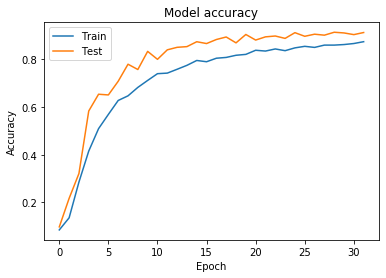

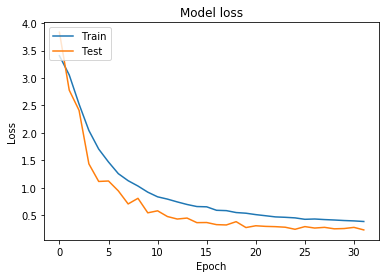

In [146]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [147]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.23671230673789978
Test accuracy: 0.9131965041160583


###### It is clear from accuracy and graph that the new model give us a better result and we are happy with the accuracy.

## Result analyze

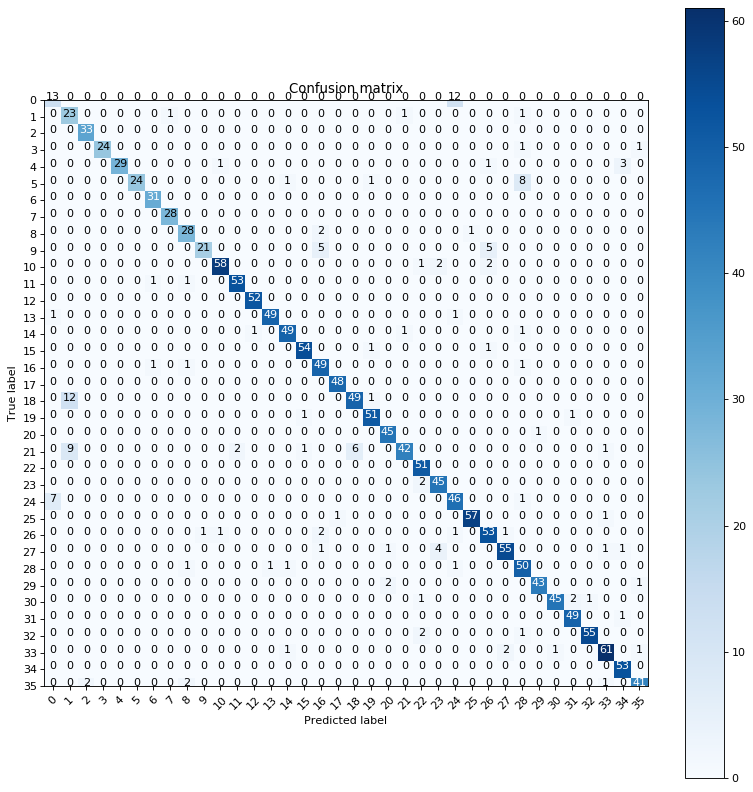

In [148]:
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib.pyplot import figure


# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    figure(figsize=(10,10), dpi=80)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(36))

In [149]:
from sklearn.metrics import classification_report


Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(y_test, axis = 1)
print(classification_report(Y_true_classes, Y_pred_classes, 
                            target_names=["Class {}".format(i) for i in range(num_classes)]))

              precision    recall  f1-score   support

     Class 0       0.62      0.52      0.57        25
     Class 1       0.52      0.88      0.66        26
     Class 2       0.94      1.00      0.97        33
     Class 3       1.00      0.92      0.96        26
     Class 4       1.00      0.85      0.92        34
     Class 5       1.00      0.71      0.83        34
     Class 6       0.94      1.00      0.97        31
     Class 7       0.97      1.00      0.98        28
     Class 8       0.85      0.90      0.88        31
     Class 9       0.95      0.68      0.79        31
    Class 10       0.97      0.92      0.94        63
    Class 11       0.96      0.96      0.96        55
    Class 12       0.98      1.00      0.99        52
    Class 13       0.98      0.96      0.97        51
    Class 14       0.94      0.94      0.94        52
    Class 15       0.96      0.96      0.96        56
    Class 16       0.83      0.94      0.88        52
    Class 17       0.98    

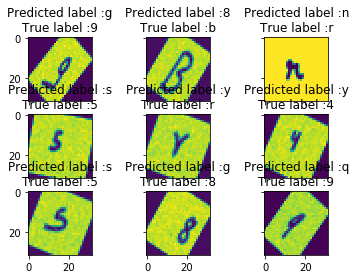

In [150]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 9 errors 
most_important_errors = sorted_dela_errors[-9:]

fig, ax = plt.subplots(3,3,sharex=True,sharey=True)

n = 0
for row in range(3):
        for col in range(3):
            error = most_important_errors[n]
            ax[row,col].imshow((X_val_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(key_dict[Y_pred_classes_errors[error]],key_dict[Y_true_errors[error]]))
            n += 1


###### We did a confusion matrix and the classification report that tells us how many are correct and what is the wrong case are. It also gives us like which character is going good and which are need to imporve.  And we find out the top 9 images that is wrong the most. By the meaning of wrong the most is the that the model has a high probility that this is a wrong character. It is clear that some image have ambiguity that even I could not figure out what it is. This is some thing we need to work for the future. 

## References

- https://www.kaggle.com/dhruvildave/english-handwritten-characters-dataset
- https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457
- https://www.tensorflow.org/datasets/keras_example
- https://www.analyticsvidhya.com/blog/2021/03/image-augmentation-techniques-for-training-deep-learning-models/
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html